# Réseaux de neurones
## 1. Introduction
- Le perceptron multicouche (PMC) et les fonctions à base radiale (RBF) sont les structures de réseaux de neurones les plus utilisées en classification supervisée, parmi une multitude de structures. 

- Ces structures ont pu attirer une grande part d’intérêt dans la recherche et ont été utilisées dans une multitude d’applications dans divers domaines. 

- Il a été aussi démontré que ces deux types de réseaux de neurones sont des approximateurs universels, grâce à leurs habilité d’approximer n’importe quelle fonction de n’importe quelle dimension avec une précision arbitraire, à condition de leur présenter un nombre de données d’entraînement suffisant et adéquat et un bon choix de leur structure.

## 2. Modèle de neurones et réseaux
L’idée des réseaux de neurones artificiels est inspirée des réseaux de neurones biologiques. Un réseau de neurones biologique est un ensemble de neurones massivement interconnectés. L’unité principale d’un réseau de neurone est le neurone. Ce dernier se compose de quatre parties principales :
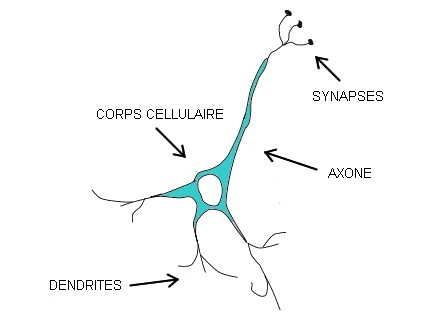
1. Les **dendrites** : Ils forment un maillage de récepteurs nerveux qui permettent d’acheminer des signaux électriques en provenance d’autres neurones vers le corps du neurone.
2. Le **soma** : Le corps de la cellule. Il agit comme une espèce d’intégrateur en accumulant des charges électriques. Lorsque le neurone devient suffisamment excité, il engendre un potentiel électrique qui se propage à travers son axone pour exciter d’autres neurones.
3. L’**axone** : Sert à transmettre les informations vers d’autres neurones ;
4. Les **synapses** : Une interface entre l’axone du neurone et les dendrites des autres
neurones.
La fonction précise d’un réseau de neurones biologique est essentiellement déterminée
par l’arrangement spatial des neurones et de leur axone, ainsi que la qualité des connexions synaptiques individuelles.


## 3. Le modèle d'un neurone
Un modèle d’un neurone artificiel est montré dans la figure ci-dessous. Il se compose essentiellement d’un ensemble d’entrées $x_{i}$ muni d’un poids $𝑤_{𝑖}$ pour chacune, une unité de calcul représentant le corps du neurone et une seule sortie.
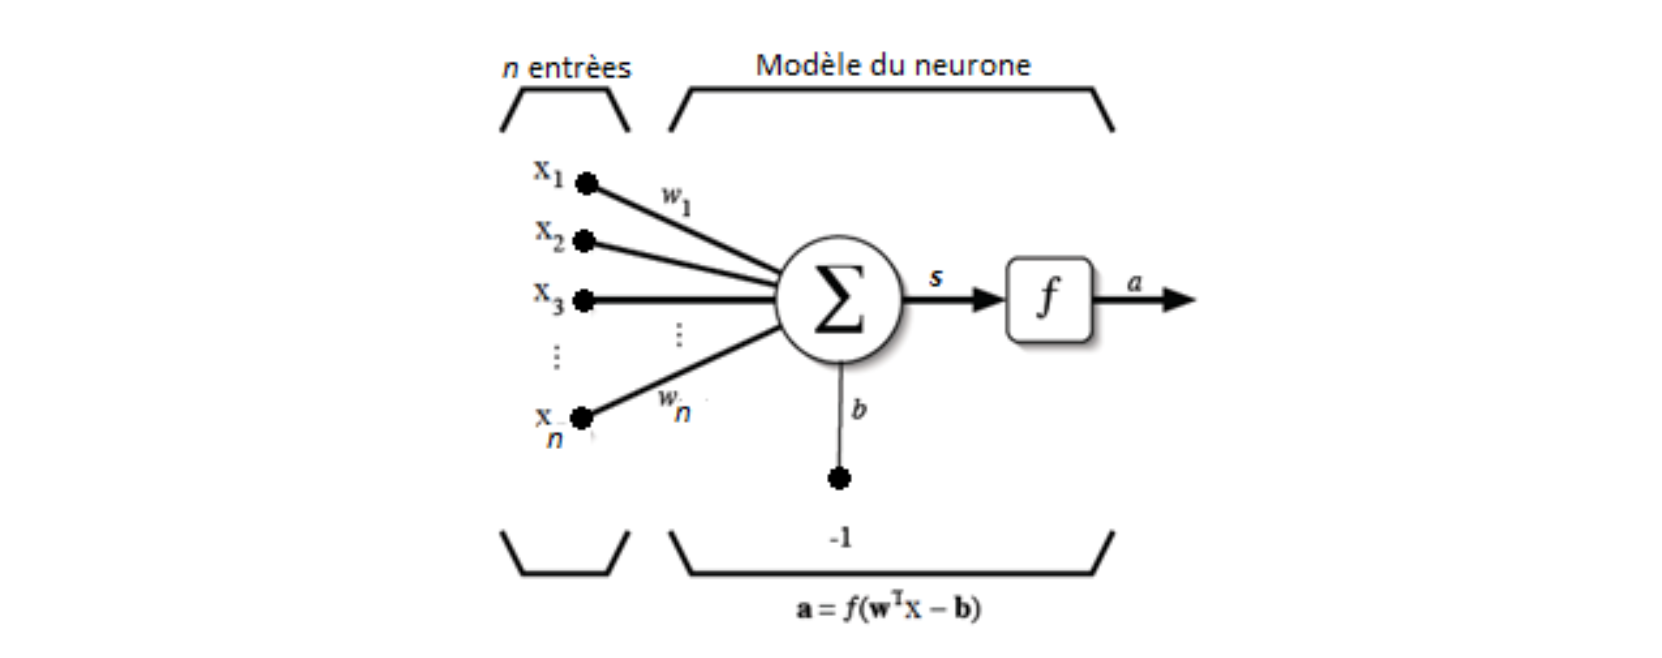

La taille du vecteur d’entrée est souvent augmentée en ajoutant une autre entrée $x_{0}= -1$ de poids b. Cette entrée supplémentaire s’appelle un biais. La sortie du neurone j est la somme des $x_{i}$ pondérés par les $𝑤_{𝑖}$ qui alimente l’entrée d’une **fonction d’activation $f$**. Cette sortie est donnée par l’équation suivante:
$$a=f(W^{T}X-b)=f\big(\sum_{i=0}^{i=n}w_{i}x_{i}\big)$$
Avec $w_{0}=b$ et $x_{0}=-1$

Il existe plusieurs possibilités pour le choix de la fonction d’activation. Le tableau suivant illustre un ensemble d’exemple des fonctions d’activation utilisables.
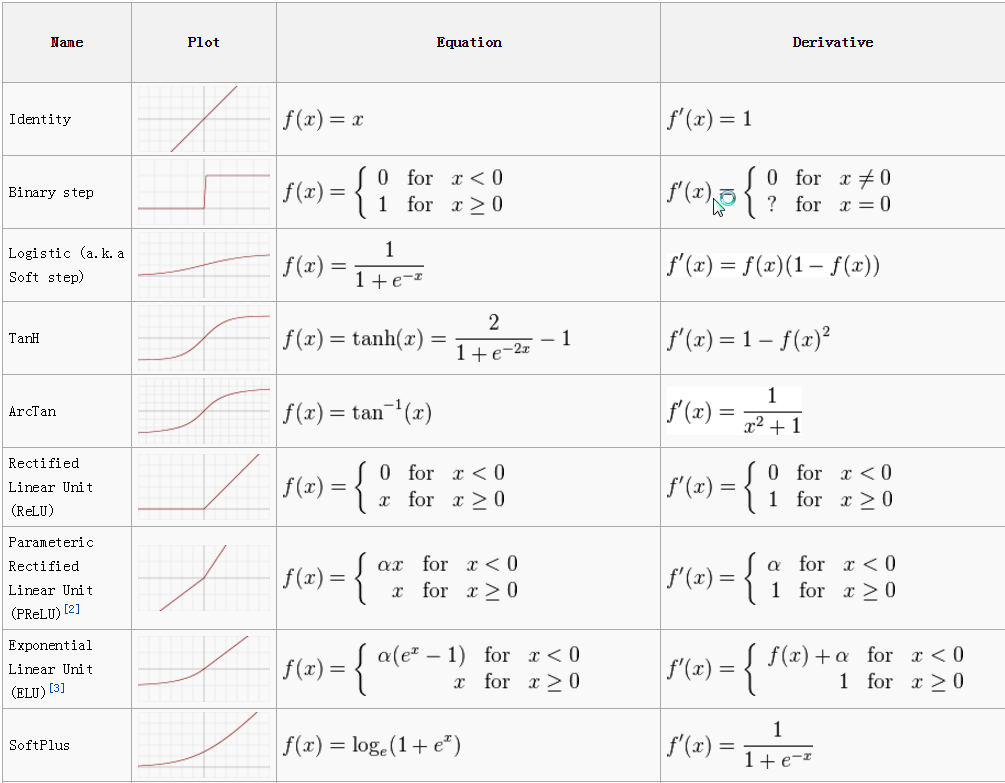



In [60]:
import numpy as np
X=np.array([0,1,0.4,1])
x=np.hstack((np.array([-1]),X))
w=np.array([6,0,1,0.4,1]).reshape((-1,1))
x
w

array([[6. ],
       [0. ],
       [1. ],
       [0.4],
       [1. ]])

In [63]:
#definition dun neurone
def neurone(x,w,f):
    return f(x.dot(w))
    

In [147]:
neurone(x,w,function_logi)
#-np.ones((len(x),1))

array([0.02104135])

In [58]:
#function step
def function_step(f):
    if f<0:
        return 0
    if f>=0:
        return 1


In [42]:
#function logistique
def function_logi(f):
    return 1/(1+np.exp(-f))

In [ ]:
##khalid hmaaaaaar
#coefficient


### 3.1 Entrainement d'un perceptron
Rosenblat a montré qu’un perceptron peut apprendre à produire n’importe quelle séparation linéaire, en utilisant un algorithme d’entraînement où les poids sont aléatoirement déterminés puis modifiés itérativement par l’équation suivante
$$w(t+1)=w(t)+\Delta w$$ avec $$\Delta w=\eta (y_{i}-\hat{y}_{i})x_{i}$$ 
Où 𝜂 est le taux d’apprentissage.

In [256]:
def train(neurone,x_train,y_train,alpha):
    w=np.random.uniform(size=x_train.shape[1])
    
   
    
    for i in  range(100):
        for j in range(len(y_train)):
            y=neurone(x_train[j],w,function_logi)
            w+=alpha*(y_train[j]-y)*x_train[j]
        
    return w

In [257]:
X_train=np.array([[1,4,5],[2,5,9],[1,-1,6],[6,7,-9]])
x_train=np.hstack((-np.ones((X_train.shape[0],1)),X_train))
y_train=np.array([1,0,0,0])
train(neurone,x_train,y_train,0.001)

array([ 0.34625701, -0.12930218, -0.10027165, -0.0019137 ])

In [255]:
def train(neurone,x_train,y_train,alpha):
    w=np.random.uniform(size=x_train.shape[1])
    b=np.random.uniform()
    for i in range(1000):
        for j in range(len(y_train)):
            t=alpha*(y_train[j]-neurone(w,x_train[j],b,6))*x_train[j]
            w=w+t
            b=b-alpha*(y_train[j]-neurone(w,x_train[j],b,6))
    return w,b

train(neurone, np.array([[0,1,0.4],[2,1,3.4],[2,1,3.4]]) ,np.array([1,0,0]), 0.001)

TypeError: neurone() takes 3 positional arguments but 4 were given

In [101]:
x_train[:,0]


array([-1., -1., -1., -1.])

Un seul perceptron n’a pas de grande utilité puisque qu’il ne converge pas dans le cas des problèmes non linéairement séparables. 

En revanche, une combinaison appropriée de plusieurs perceptrons est d’une puissance considérable pour ce genre de problèmes. 

Une structure bien connue dans le domaine, appelée le perceptron multicouche (PMC), où les neurones sont structurés sous forme de couches et l’information passe d’une couche à l’autre jusqu'à ce qu’elle attient sa destination, a bien montré ses performances de grandes qualités.

## 4. le réseau de neurones
En général, un réseau de neurones est un maillage de plusieurs neurones organisés en couches. Chaque couche contient R neurones connectés aux n entrées. On dit alors que la couche est totalement connectée. Un poids 𝑤𝑖𝑗 est associé à chacune des connexions. L’ensemble des poids d’une couche forme une matrice W de dimension S×R 
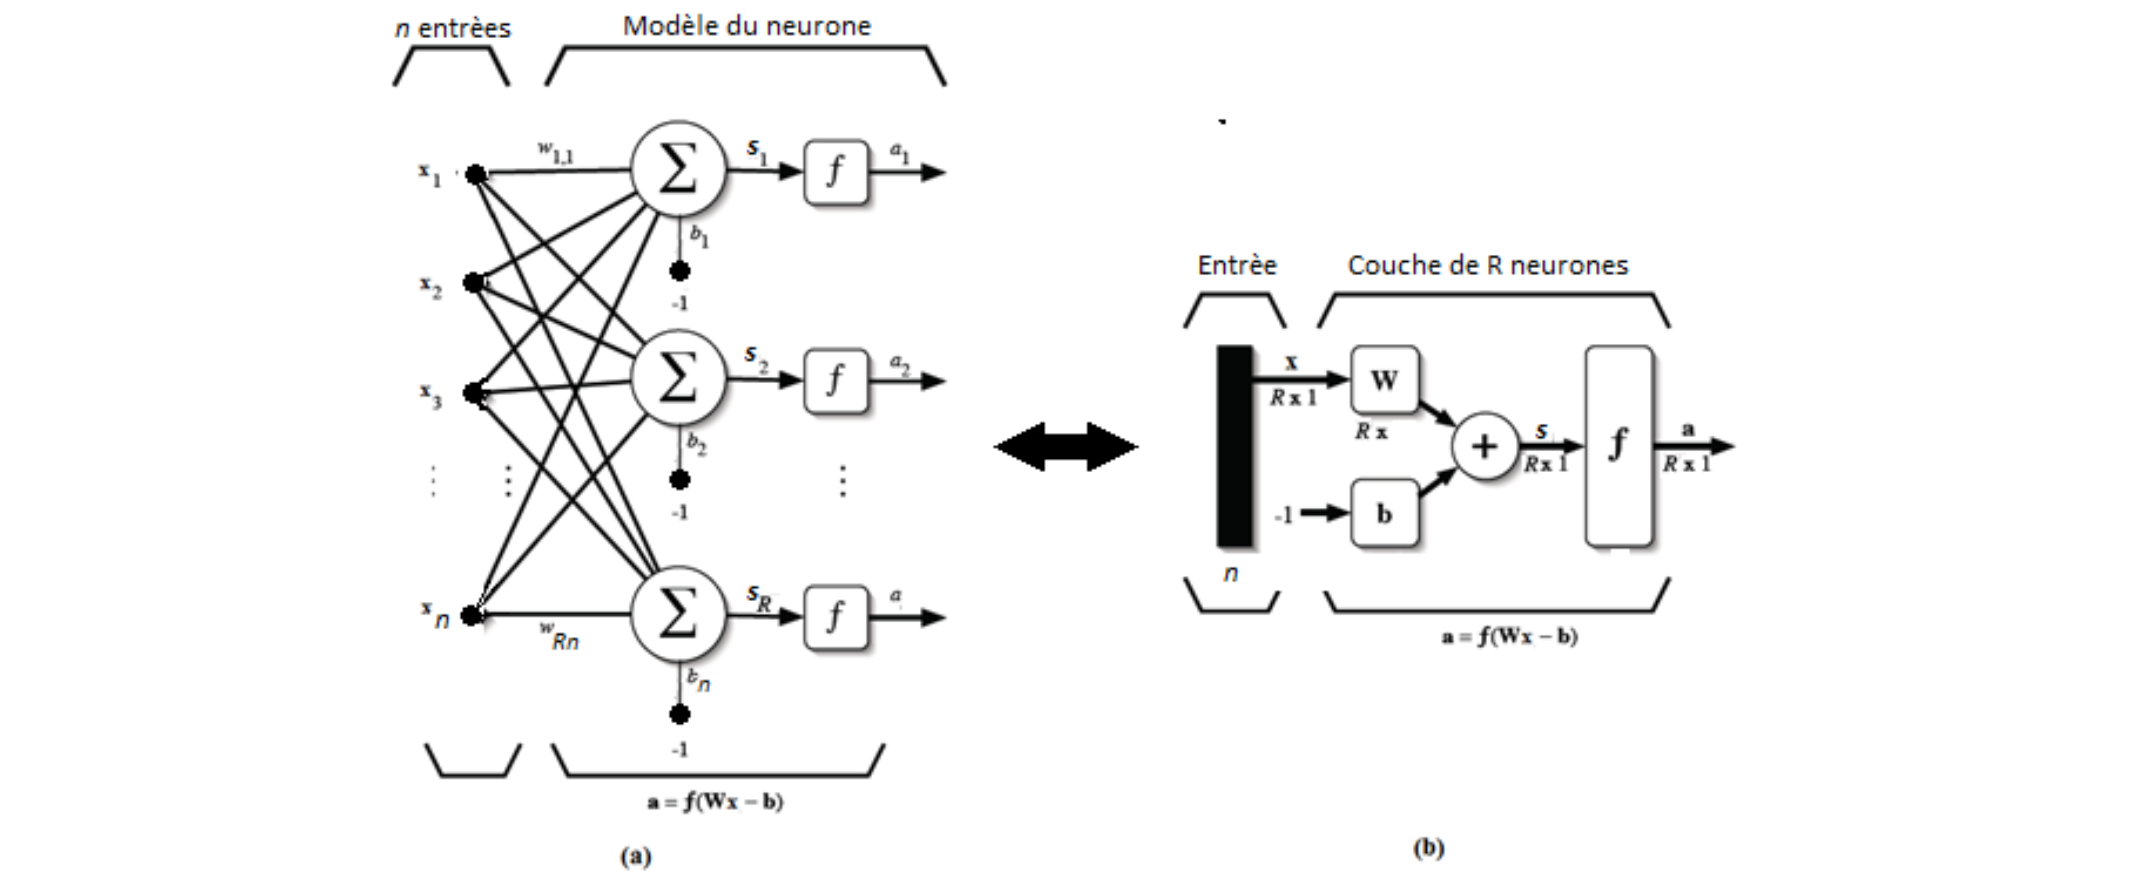

## 5. Le perceptron multicouche (PMC)